In [ ]:
from google.colab import drive

# mounting my google drive
drive.mount("/content/gdrive", force_remount=True)

pic_root = "/content/gdrive/MyDrive/Astronomie/Astrophoto/NGC 869/Shoot 3/"

import os

# ! ls $pic_root
print(os.path.exists(pic_root))
print(os.listdir(pic_root))

# Clone the repo "Handheld Multi-Frame Super-Resolution"
! git clone https://github.com/Jamy-L/Handheld-Multi-Frame-Super-Resolution.git





Mounted at /content/gdrive
True
['P1030734.dng', 'P1030744.dng', 'P1030747.dng', 'P1030745.dng', 'P1030748.dng', 'P1030750.dng', 'ngc869_210524_super_resolution.png', 'super_resolution.png']
Cloning into 'Handheld-Multi-Frame-Super-Resolution'...
remote: Enumerating objects: 1465, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 1465 (delta 99), reused 119 (delta 94), pack-reused 1288
Receiving objects: 100% (1465/1465), 915.21 KiB | 17.60 MiB/s, done.
Resolving deltas: 100% (1079/1079), done.


In [ ]:
mfsr_root = "Handheld-Multi-Frame-Super-Resolution"
# creating a virtual env to not get conflicts with default collab env
# ! pip install virtualenv
# # ! apt install python3.10-venv
# !virtualenv /content/gdrive/MyDrive/venvs/mf-superres
# print("Installing requirements ...")
# os.chdir(mfsr_root)
# !source /content/gdrive/MyDrive/venvs/mf-superres/bin/activate; pip install -r "requirements.txt"

When the env is created in your G-drive, with the packages installed inside it, you can comment the code above (for installing requirements), and just import the path to your env packages to use them as below.

In [ ]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
sys.path.append("/content/gdrive/MyDrive/venvs/mf-superres/lib/python3.10/site-packages")


In [ ]:
os.chdir(mfsr_root)
print(os.getcwd())

/content/Handheld-Multi-Frame-Super-Resolution


In [ ]:
import matplotlib.pyplot as plt
from handheld_super_resolution import process
from skimage import img_as_ubyte

We prepare the context of execution of the super_resolution algorithm with options, parameters etc...

In [ ]:
# Specify verbose options
options = {'verbose' : 1}



# Specify the scale as follows. All the parameters are automatically
# choosen but can be overwritten : check params.py to see the entire list
# of configurable parameters.
params={
        "scale":1,
        "debug":True,
        "merging" : {
            "kernel": "handheld"},
        "accumulated robustness denoiser" : {
                    # Trying a median filter at first because we process astronomical pictures captures with a high camera gain (ISO)
                    # "median":{"on":False, # post process median filter
                    #           "radius max":3,  # maximum radius of the median filter. Tt cannot be more than 14. for memory purpose
                    #           "max frame count": 8}#,
                    # "gauss":{"on":False, # post process gaussian filter
                    #          "sigma max" : 1.5, # std of the gaussian blur applied when only 1 frame is merged
                    #          "max frame count" : 8}#, # number of merged frames above which no blur is applied
                    "merge":{"on":True, # filter for the ref frame accumulation
                             "rad max": 2,# max radius of the accumulation neighborhod
                             "max multiplier": 8, # Multiplier of the covariance for single frame SR
                             "max frame count" : 8} # # number of merged frames above which no blur is applied
                    },
        "post processing" : {
            "on":True,
            "do color correction":False,
            "do tonemapping":True,
            "do gamma":True,
            "do devignette":False,
            "do sharpening":False
            }
        # Post processing is enabled by default,
        # but it can be turned off here
        }

# calling the pipeline
output_img, debug_dict = process(pic_root, options, params)


/content/Handheld-Multi-Frame-Super-Resolution/handheld_super_resolution/utils_dng.py:113: UserWarning: The input images have a photometric interpretation of type "RGB", but only ['BlackIsZero', 'Color Filter Array'] are supprted.
  warnings.warn('The input images have a photometric interpretation '\


Estimating noise curves ...


Brightnesses: 100%|██████████| 126/126 [00:11<00:00, 11.17it/s]
/content/Handheld-Multi-Frame-Super-Resolution/handheld_super_resolution/params.py:25: UserWarning: Warning.... Tile sizes of more than 32 cannot be                       processed by the bloc matching module at the moment.                      Falling back to Ts=32
  warnings.warn("Warning.... Tile sizes of more than 32 cannot be \


  ----------
|ISO : 1600
|Image brightness : 0.06
|expected noise std : 7.18e-03
|Estimated SNR : 7.96

Processing reference image ---------



/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 48 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))



Ref Img processed (Total)                          :  3628.1 milliseconds

Processing image 1 ---------



/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 12 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 48 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 48 will likely result in GPU under-utilization due to


Image processed (Total)                            :  9174.81 milliseconds

Processing image 2 ---------


Image processed (Total)                            :  362.14 milliseconds

Processing image 3 ---------


Image processed (Total)                            :  341.46 milliseconds

Processing image 4 ---------


Image processed (Total)                            :  339.98 milliseconds

Processing image 5 ---------


Image processed (Total)                            :  339.09 milliseconds

Total ellapsed time :                              :  15.42 seconds
Beginning post processing


95 126


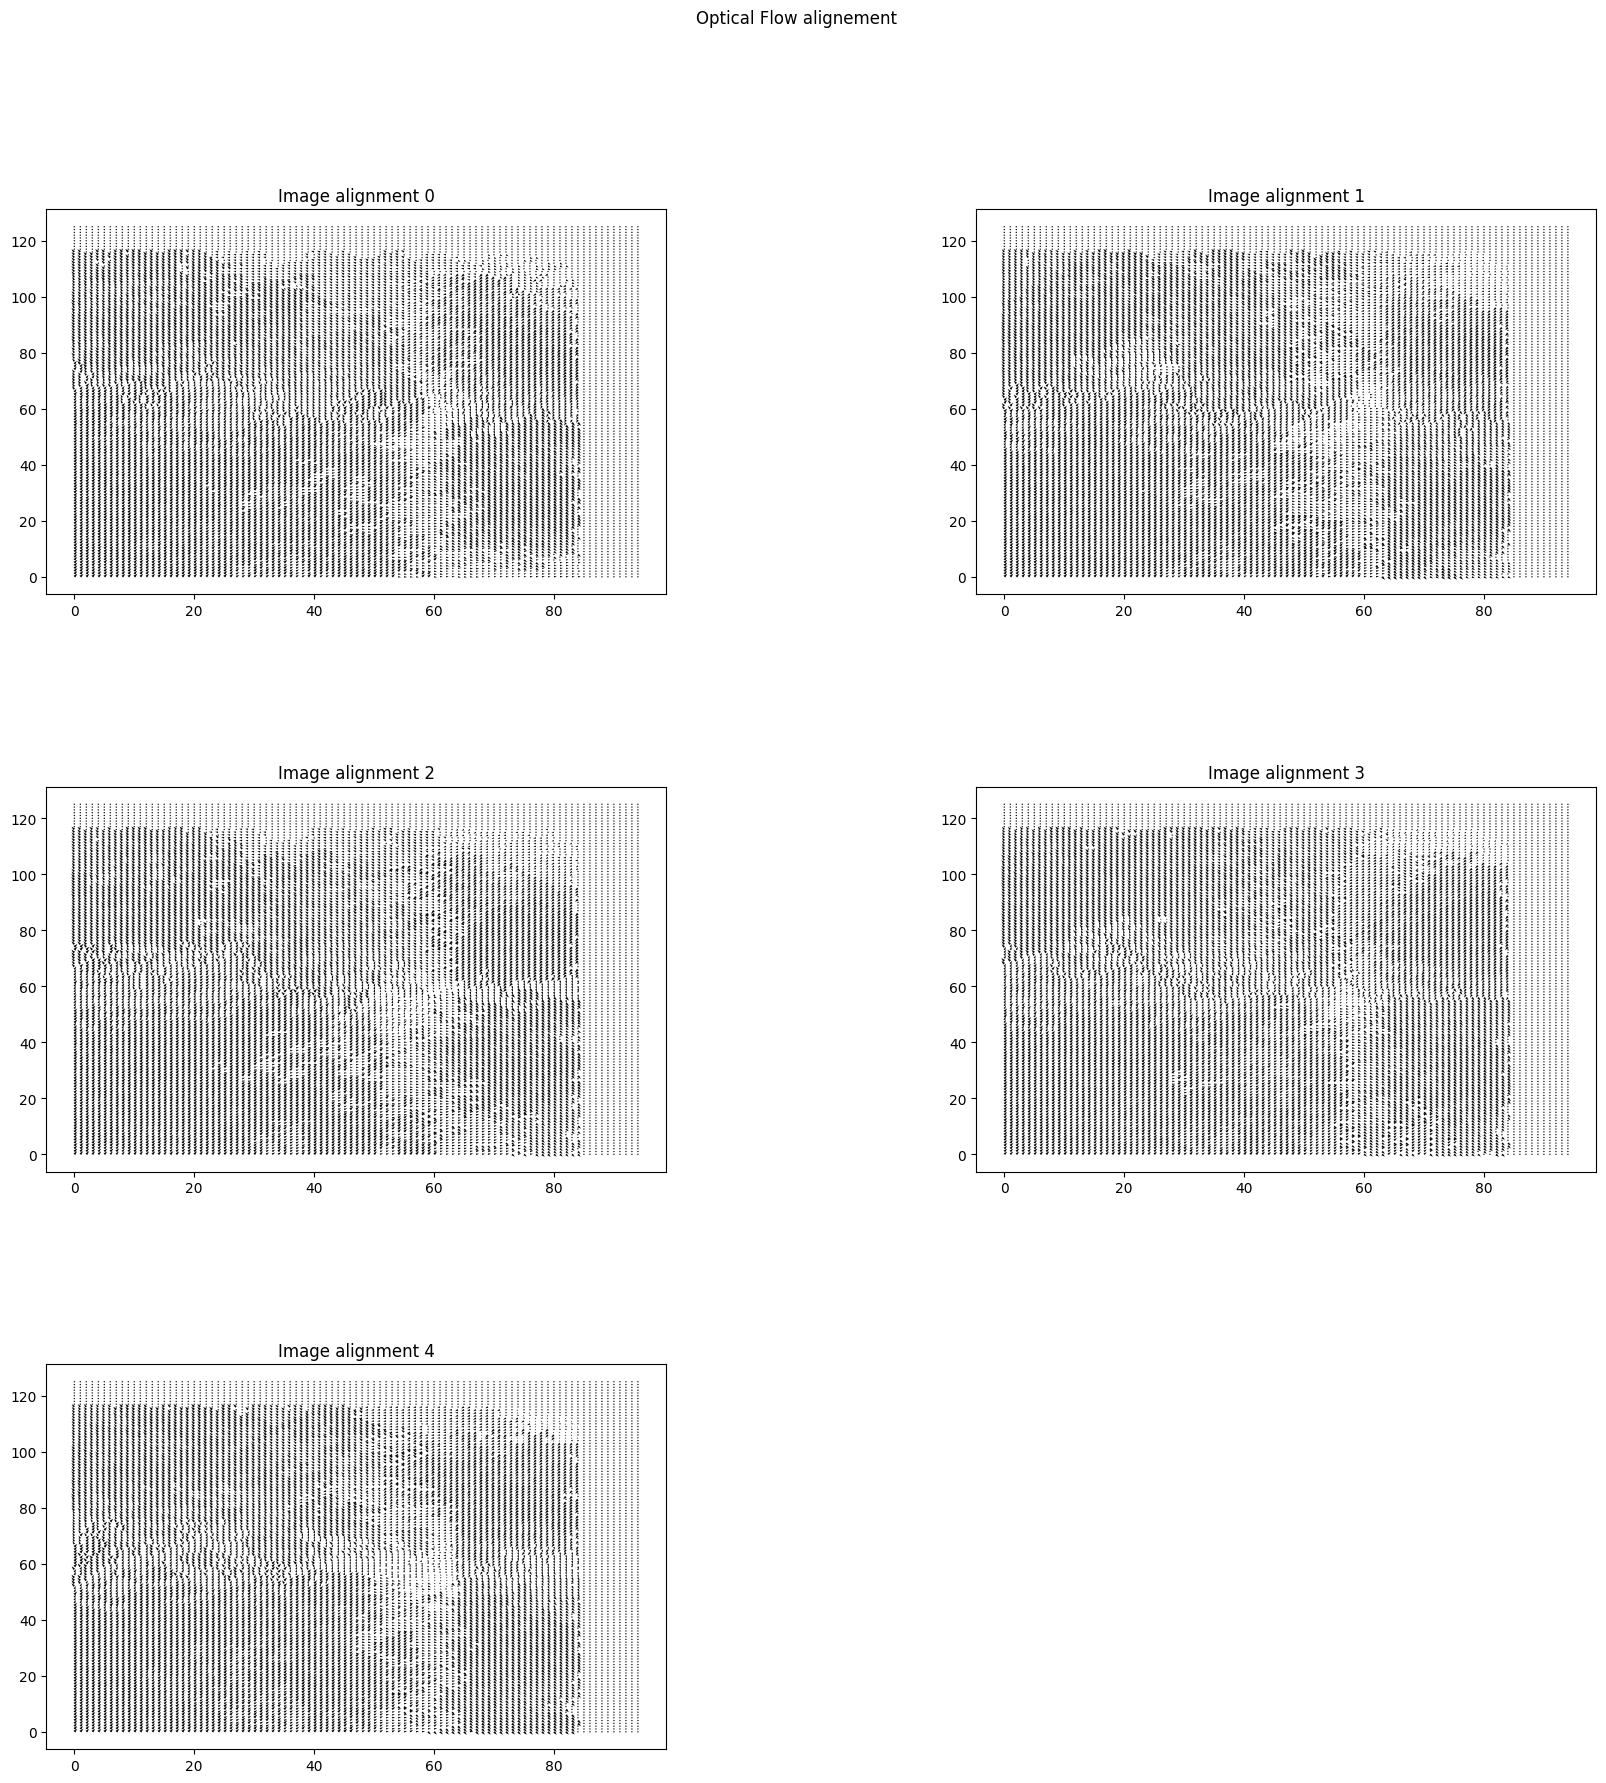

In [ ]:
import numpy as np
# Plotting intermediate results on alignment, robustness, etc ..
# debug_dict["flow"].shape
# debug_dict["robustness"].shape
flow = np.array(debug_dict["flow"])
print(flow.shape[1], flow.shape[2])

if debug_dict is not None:
  # plt.figure("Optical Flow alignment")
  # plt.imshow(flow[0,:,:,0])
  fig, axs = plt.subplots(3, 2, figsize=(20,20))
  fig.suptitle("Optical Flow alignement")
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
  for i in range(0,flow.shape[0]):
    x,y = np.mgrid[0:flow.shape[1], 0:flow.shape[2]]
    ax = axs[i//2][i%2]
    ax.set_title("Image alignment {}".format(i))
    ax.quiver(x, y, flow[i,:,:,0], flow[i,:,:,1])

axs[2][1].set_visible(False)


(5, 3016, 4016)


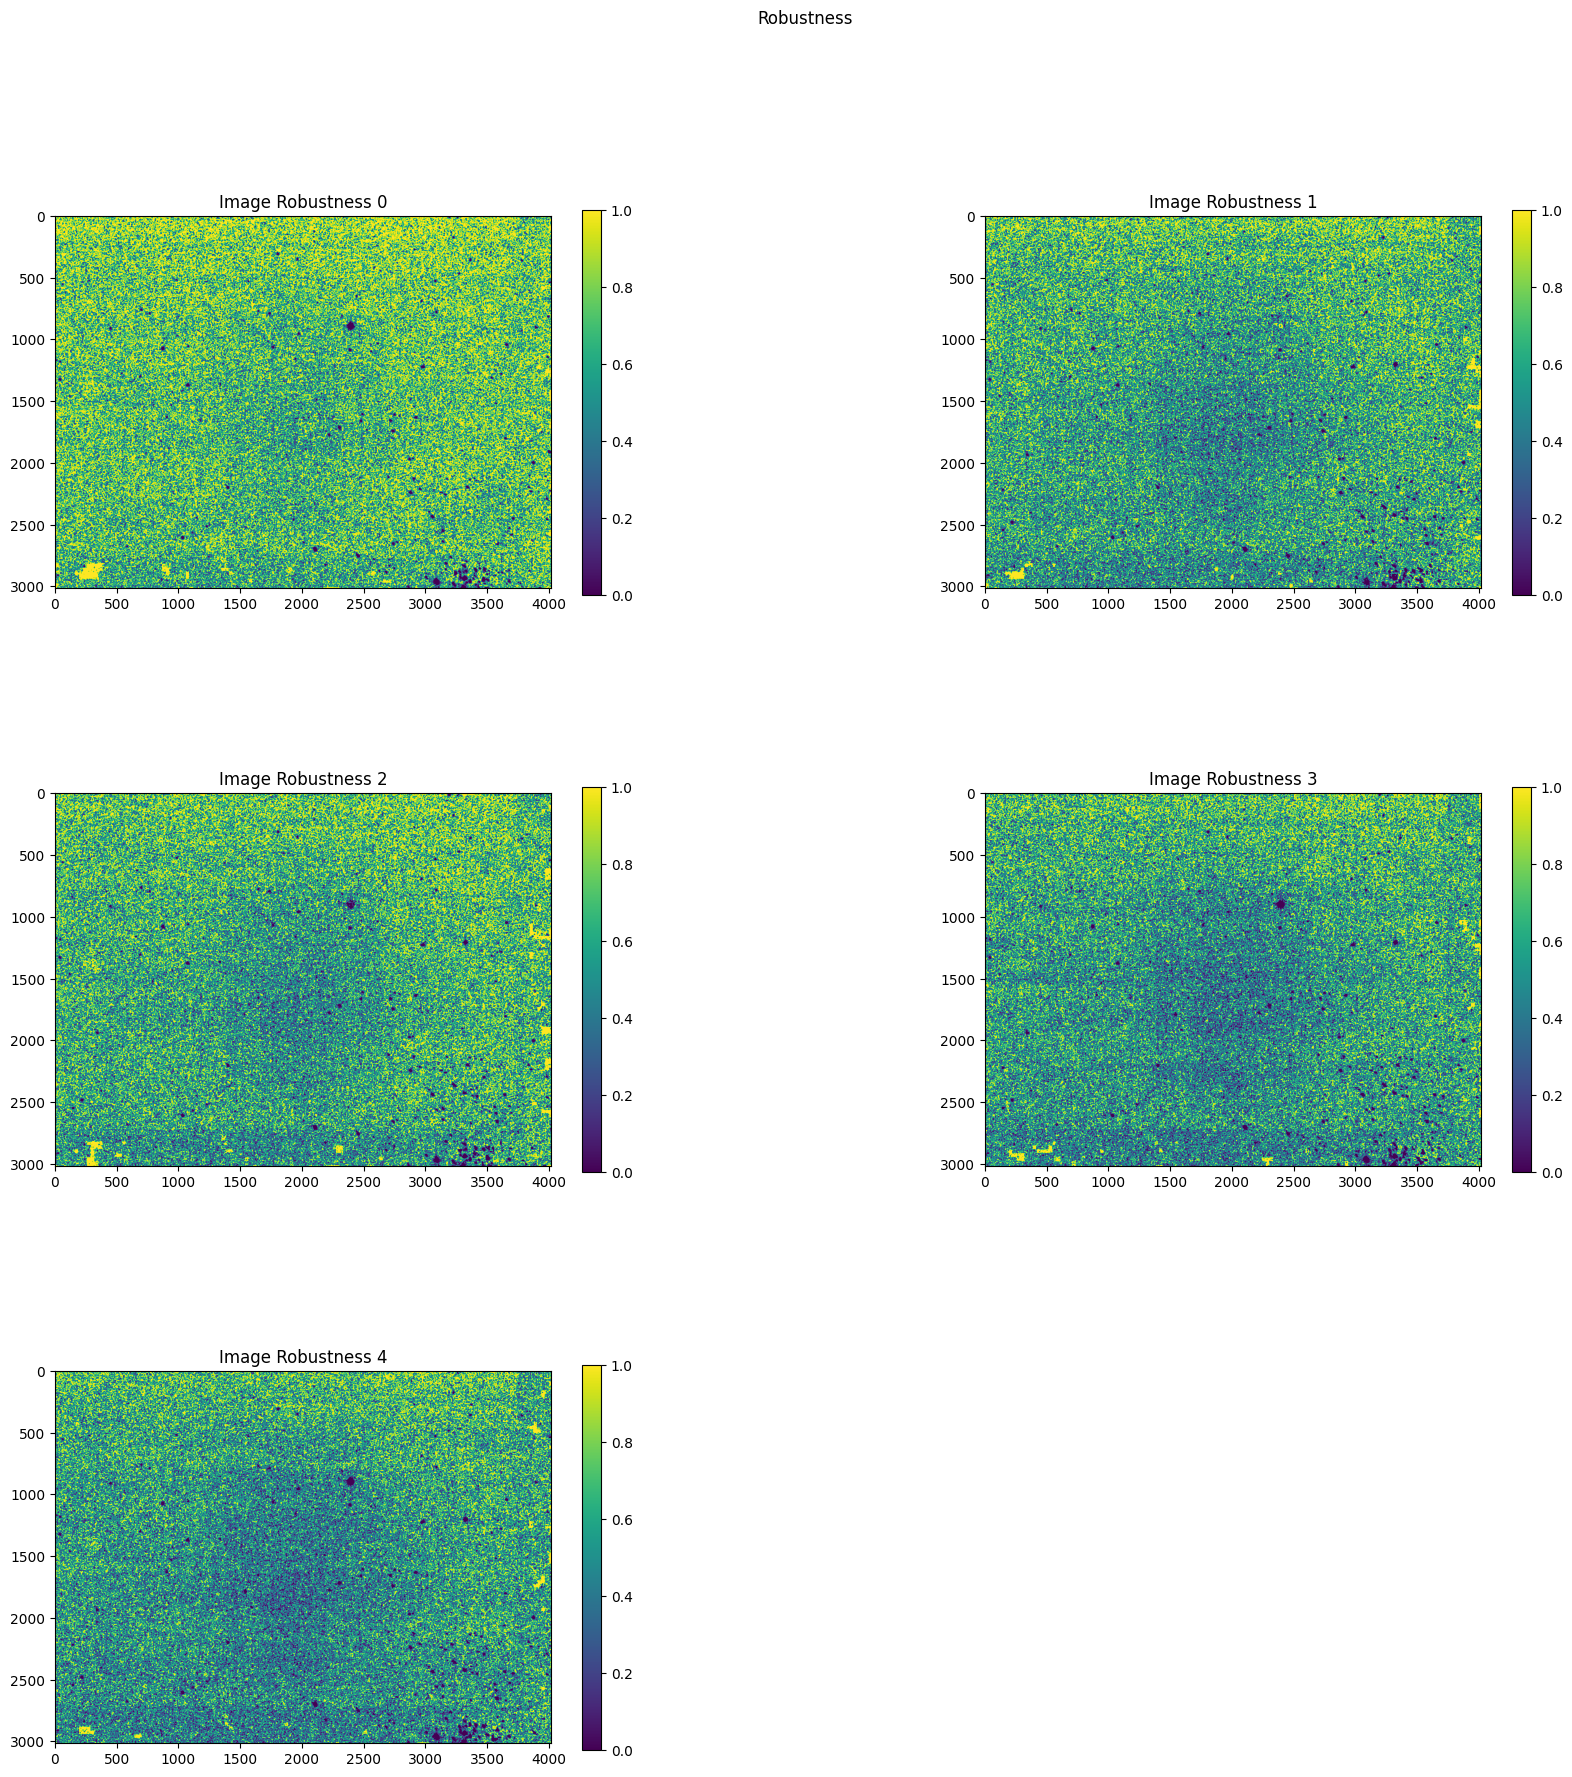

In [ ]:
robustness = np.array(debug_dict["robustness"])
print(robustness.shape)

if debug_dict is not None:
  fig, axs = plt.subplots(3, 2, figsize=(20,20))
  fig.suptitle("Robustness")
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
  for i in range(0,robustness.shape[0]):
    x,y = np.mgrid[0:robustness.shape[1], 0:robustness.shape[2]]
    ax = axs[i//2][i%2]
    ax.set_title("Image Robustness {}".format(i))
    img = ax.imshow(robustness[i,:,:])
    fig.colorbar(img,ax=ax)

axs[2][1].set_visible(False)
plt.show()

(3016, 4016)


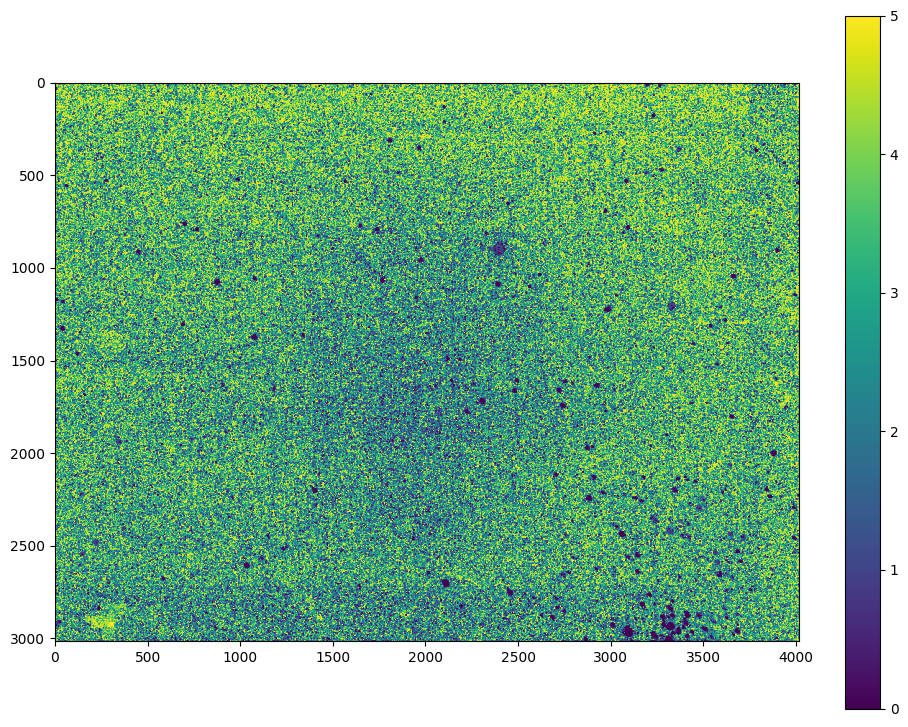

In [ ]:
acc_robustness = np.array(debug_dict["accumulated robustness"])
print(acc_robustness.shape)

if debug_dict is not None:
  fig = plt.figure("Accumulated Robustness", figsize=(12,9))
  im = plt.imshow(acc_robustness, interpolation = 'none')
  fig.colorbar(im)
  plt.show()

([], [])

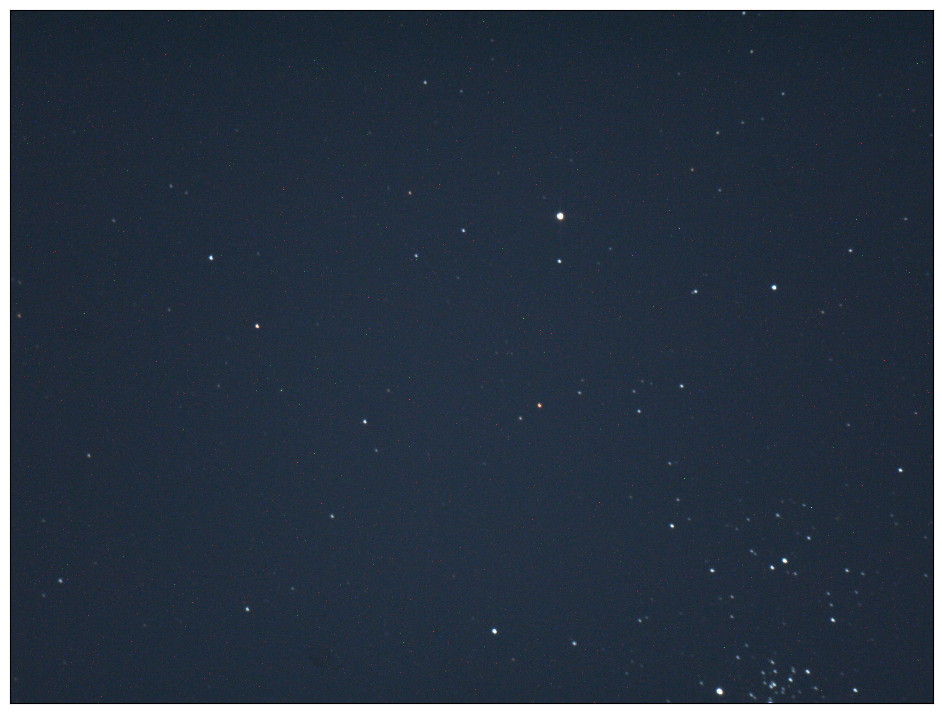

In [ ]:
plt.imsave(os.path.join(pic_root, "super_resolution.png"), img_as_ubyte(output_img))
# plotting the result
plt.figure("output", figsize=(12,9))
plt.imshow(output_img, interpolation = 'none')
plt.xticks([])
plt.yticks([])